In [1]:
import pandas as pd
from finta import TA as ta
from tqdm import tqdm
import os

In [4]:
path = "../archive/yahoo/"

In [5]:
for s in tqdm(os.listdir(path)):
    
    df = pd.read_csv(os.path.join(path, s))

    try:
        df['VWAP'] = ta.VWAP(df)
        df['ATR'] = ta.ATR(df)
        df['RSI'] = ta.RSI(df) / 100
        df['ADX'] = ta.ADX(df) / 100
        df['WILLIAMS'] = ta.WILLIAMS(df) / 100
        df = pd.concat([df, ta.BBANDS(df), ta.VORTEX(df), ta.PIVOT_FIB(df)], axis=1)   

        # fillna
        to_fill_with = df.dropna().iloc[0]
        df.fillna(to_fill_with, inplace=True)

        # normalized bbands 
        for bb in ['VWAP', 'BB_LOWER', 'BB_MIDDLE', 'BB_UPPER', 'pivot', 's1', 's2', 's3', 's4', 'r1', 'r2', 'r3', 'r4']:
            df[bb] /= df.High

        df.to_csv(os.path.join(path, s), index=False)

    except:
        os.remove(os.path.join(path, s))

100%|███████████████████████████████████████| 6938/6938 [12:51<00:00,  8.99it/s]


In [70]:
test = pd.read_csv('archive/Stocks/msft.us.txt')

In [71]:
test

,Date,Open,High,Low,Close,Volume,OpenInt,VWAP,ATR,RSI,...,VIp,pivot,s1,s2,s3,s4,r1,r2,r3,r4
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0,0.964025,0.004646,0.531503,...,1.125000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0,0.972298,0.004646,0.531503,...,1.125000,0.964025,0.922798,0.897327,0.856100,0.814872,1.005252,1.030723,1.071950,1.113177
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0,0.974803,0.004646,0.531503,...,1.125000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0,0.975911,0.004646,0.531503,...,1.125000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0,0.976637,0.004646,0.531503,...,1.125000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7978,2017-11-06,84.20000,84.70000,84.08250,84.47000,19852151,0,0.181979,1.371964,0.846857,...,1.080828,0.992050,0.986909,0.983733,0.978591,0.973450,0.997192,1.000368,1.005510,1.010651
7979,2017-11-07,84.77000,84.90000,83.93000,84.26000,17927878,0,0.181574,1.406964,0.822320,...,1.064983,0.994317,0.991538,0.989822,0.987044,0.984265,0.997095,0.998812,1.001590,1.004368
7980,2017-11-08,84.14000,84.61000,83.83000,84.56000,18029584,0,0.182219,1.421250,0.829902,...,1.060309,0.997085,0.992705,0.990000,0.985620,0.981241,1.001464,1.004170,1.008549,1.012928
7981,2017-11-09,84.11000,84.27000,82.90000,84.09000,21175384,0,0.182981,1.464107,0.774165,...,0.971704,1.000752,0.997216,0.995031,0.991496,0.987960,1.004287,1.006472,1.010008,1.013543


In [72]:
import matplotlib.pyplot as plt

In [73]:
test_sample = test.iloc[:50]

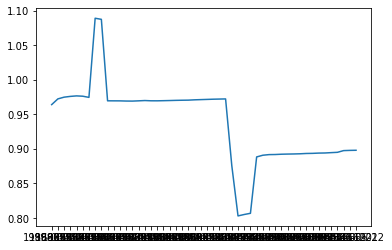

In [74]:
plt.plot(test_sample.Date, test_sample.VWAP)

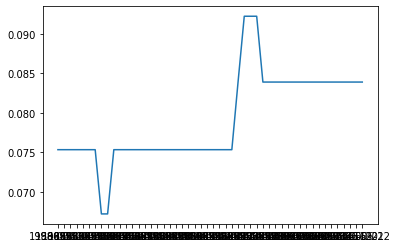

In [75]:
plt.plot(test_sample.Date, test_sample.High)

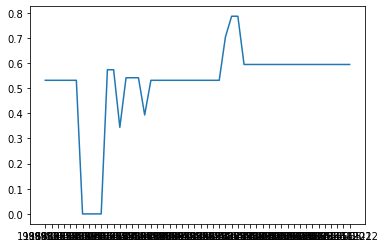

In [76]:
plt.plot(test_sample.Date, test_sample.RSI)

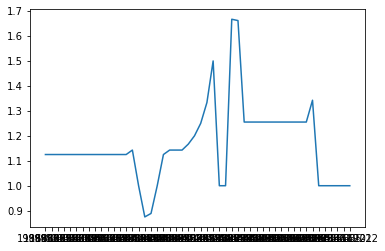

In [77]:
plt.plot(test_sample.Date, test_sample.VIp)

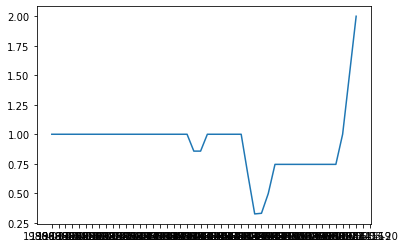

In [78]:
plt.plot(test_sample.Date, test_sample.VIm)

In [79]:
test_sample[['High', 'RSI']].corr()

,High,RSI
High,1.000000,0.650826
RSI,0.650826,1.000000
